# Tissue classifier

In this notebook I'll develop a model to classify the tissue of a subset of images from CMP.

## libraries

In [1]:
from CMP_functions.preprocessing import *

import glob
import os
import random 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


## Data

In [2]:
PATH_info = '../data/images_info_table.csv'
PATH_img = '../data/images_jpeg/'
PATH_folders = '../classification_set/'

### Image selection 

- select only tissue with more than 20 images
- split in train and validation (80-20)
- create folder with link to the images

In [62]:
#load im info
info_df = pd.read_csv(PATH_info)

#get tissue with more than 20 images
class_count, class_list = get_classes(info_df, 'tissue', 20)

#subset im info to have only 20+ tissue images
info_df_20 = info_df[info_df.tissue.isin(class_list)]

#here i split the dataset n train and validatio
split = 0.8
all_im = list(info_df_20.im_id)

train_size = round(len(all_im)*split)
validation_size = len(all_im) - train_size

train_im = random.sample(all_im, train_size)
validation_im = [im for im in all_im if im not in train_im]

info_df_train = info_df_20[info_df_20.im_id.isin(train_im)]
info_df_valid = info_df_20[info_df_20.im_id.isin(validation_im)]

#dictionary to be use while linking
name_to_class_train = get_img_dict(info_df_train, class_list,'tissue')
name_to_class_valid = get_img_dict(info_df_valid, class_list,'tissue')

Soft Tissue not considered
Cervix not considered
Bladder not considered
Thyroid not considered
Prostate not considered
Liver not considered
Endometrium not considered
Testis not considered
Vulva not considered
Biliary Tract not considered
Adrenal Gland not considered
Uterus not considered
Placenta not considered


In [64]:
#folders to creates subdir
os.mkdir(PATH_folders+'train')
os.mkdir(PATH_folders+'validation')

In [33]:
def create_class_folders2(class_list, data_dir):

    for cl in class_list:
        try:
            os.mkdir(data_dir+'/'+cl)
        except OSError:
            print (f'Sub-directory {cl} already exists')
        else:
            print (f'Successfully created the sub-directory {cl}')

In [88]:
# create_class_folders2(class_list, PATH_folders+'train/')
# create_class_folders2(class_list, PATH_folders+'validation/')

In [87]:
# link_images(PATH_img, name_to_class_train, PATH_folders+'train/')
# link_images(PATH_img, name_to_class_valid, PATH_folders+'validation/')

### Images from file to data generator



In [4]:
# create a data generator

datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=False, 
                                                       samplewise_center=False,
                                                       featurewise_std_normalization=False,
                                                       samplewise_std_normalization=False,
                                                       zca_whitening=False,
                                                       zca_epsilon=1e-06,
                                                       rotation_range=0,
                                                       width_shift_range=0.0,
                                                       height_shift_range=0.0,
                                                       brightness_range=None,
                                                       shear_range=0.0,
                                                       zoom_range=0.0,
                                                       channel_shift_range=0.0,
                                                       fill_mode='nearest',
                                                       cval=0.0,
                                                       horizontal_flip=False,
                                                       vertical_flip=False,
                                                       rescale=None,
                                                       preprocessing_function=None,
                                                       data_format='channels_last',
                                                       validation_split=0.0,
                                                       interpolation_order=1,
                                                       dtype='float32')





In [3]:
# load and iterate training dataset

train = datagen.flow_from_directory('../classification_set/train/', 
                                       class_mode='categorical',
                                       batch_size=32)

val = datagen.flow_from_directory('../classification_set/validation/',
                                     class_mode='categorical',
                                     batch_size=32)


NameError: name 'datagen' is not defined

In [70]:
train.target_size

(256, 256)

### Definition of the network

In [73]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dense(14))
model.add(Activation("softmax"))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training and validation of the network

In [74]:
history = model.fit_generator(
    train,
    steps_per_epoch=22,
    epochs=5,
    validation_data=val,
    validation_steps=22)

Epoch 1/5
22/22 [==============================] - 111s 5s/step - loss: 16857.5753 - accuracy: 0.1050 - val_loss: 987.8125 - val_accuracy: 0.1854
Epoch 2/5
22/22 [==============================] - 94s 4s/step - loss: 521.9822 - accuracy: 0.2055 - val_loss: 84.9674 - val_accuracy: 0.2177
Epoch 3/5
22/22 [==============================] - 93s 4s/step - loss: 15.5449 - accuracy: 0.7216 - val_loss: 27.0479 - val_accuracy: 0.0608
Epoch 4/5
22/22 [==============================] - 129s 6s/step - loss: 0.7413 - accuracy: 0.9388 - val_loss: 37.5198 - val_accuracy: 0.1701
Epoch 5/5
22/22 [==============================] - 93s 4s/step - loss: 0.1230 - accuracy: 0.9895 - val_loss: 80.3220 - val_accuracy: 0.2129


### Result of the training step

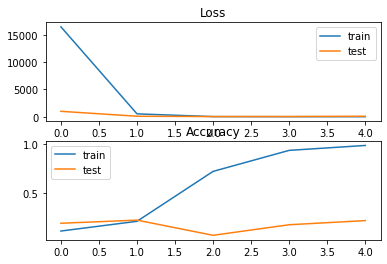

In [84]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.show()

## Same dataset, batch size and architecture, different n of epoch and  steps

In [89]:
history = model.fit_generator(
    train,
    steps_per_epoch=3,
    epochs=15,
    validation_data=val,
    validation_steps=3)

Epoch 1/15
3/3 [==============================] - 16s 5s/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 23.9948 - val_accuracy: 0.1979
Epoch 2/15
3/3 [==============================] - 12s 4s/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 25.0105 - val_accuracy: 0.3134
Epoch 3/15
3/3 [==============================] - 13s 4s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 41.1856 - val_accuracy: 0.2396
Epoch 4/15
3/3 [==============================] - 13s 4s/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 25.7280 - val_accuracy: 0.2687
Epoch 5/15
3/3 [==============================] - 11s 4s/step - loss: 0.0545 - accuracy: 0.9896 - val_loss: 50.0575 - val_accuracy: 0.1642
Epoch 6/15
3/3 [==============================] - 14s 5s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 24.5767 - val_accuracy: 0.1771
Epoch 7/15
3/3 [==============================] - 17s 6s/step - loss: 7.0842 - accuracy: 0.8021 - val_loss: 214.9998 - val_accuracy: 0.1940
Epoch 8/15
3/3 [==========

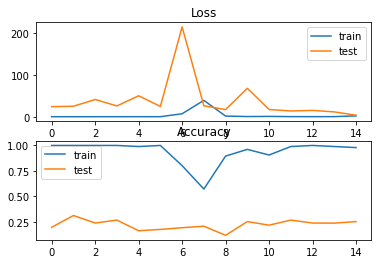

In [90]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.show()